##### Next update of this network contains:
- normal costs
- normal width
- all edges connected
- proper nodes at one-way bridges, adding bridges to network.
- node_id; have been added
- edge_id ; have been added

In [1]:
import random
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Show with attributes 
graph = gpd.read_file('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/edges_water/edges_water.shp')
print(graph.iloc[3]['cost'])
print(graph.head()) # see what attrinutes the edges and nodes from the shapefile contain

6.68129704879482
         cost  source  target  source_aan  target_aan      width  \
0    2.483749     5.0     3.0         3.0         3.0  24.797941   
1  101.826942     5.0   254.0         3.0         3.0  17.942054   
2   11.685232   212.0   217.0         3.0         3.0  10.357033   
3    6.681297   212.0   215.0         3.0         3.0   4.825559   
4    5.221776   215.0   213.0         3.0         3.0   4.365561   

                                            geometry  
0  LINESTRING (120005.5486256767 487357.479141514...  
1  LINESTRING (120005.5486256767 487357.479141514...  
2  LINESTRING (120071.6506543915 487249.971786562...  
3  LINESTRING (120071.6506543915 487249.971786562...  
4  LINESTRING (120074.1340182582 487243.773574981...  


In [3]:
G=nx.read_shp('/Users/JeroenvanderDoes/Dropbox/Studie/Master/Thesis/Onderwerpen/Programs/QGIS/waterways_amsterdam_bewerkt/edge_data_lengte.shp', simplify=True) # use simplify is true otherwise chart get shifted
w_G = nx.Graph()
color_map = []
lat_lon_to_index = {}
h = list(G.nodes(data=True)) # in de shapefile nodes are positioned as lonlat instead of latlon
print (h[1])
for i, node in enumerate(G.nodes()): #adds nodes with label 1 till n nodes to the network. 
    w_G.add_node(i, pos= node)
    lat_lon_to_index[node] = i
    color_map.append('r')
    
for edge in G.edges(data=True): # adds edges with attributes to the graph from shapefile according to the order in which the edges are ordered in the shapefile
    w_G.add_edge(lat_lon_to_index[edge[0]], lat_lon_to_index[edge[1]], dis=edge[2]['cost'] )
    
c =list(w_G.nodes(data = True))
j = list(w_G.edges(data = True))

print(c[1])
print(j[1])


((4.8719547, 52.3651758), {})
(1, {'pos': (4.8719547, 52.3651758)})
(1, 20, {'dis': 50.5301293256479})


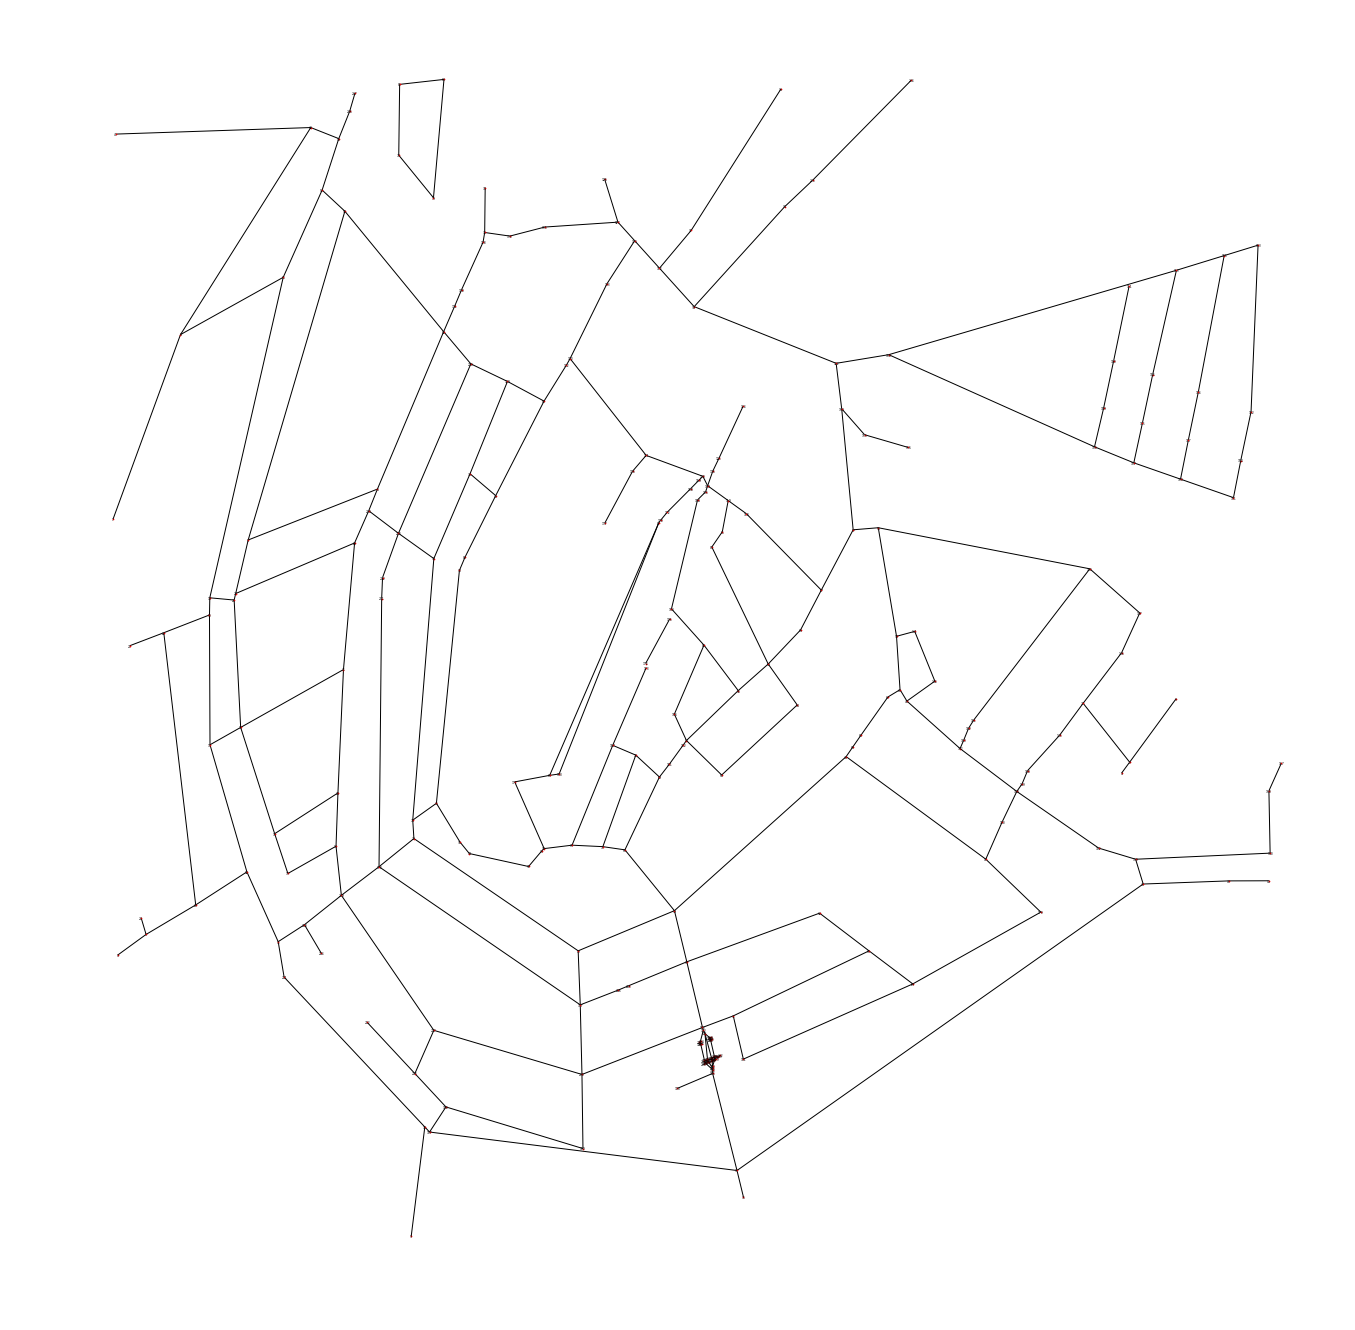

In [4]:
plt.figure(figsize=(18,18))
nx.draw(w_G, nx.get_node_attributes(w_G, 'pos'), with_labels=True, node_size=0.5, font_size = 3)
plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_8.pdf', format='pdf', rasterized=False)
plt.show()

In [5]:
labels = nx.get_edge_attributes(w_G,'dis')

In [10]:
import utm
import networkx as nx
import geopy.distance

location1 = utm.from_latlon(nx.get_node_attributes(w_G, 'pos')[24][0],nx.get_node_attributes(w_G, 'pos')[24][1],)
location2 = utm.from_latlon(nx.get_node_attributes(w_G, 'pos')[15][0],nx.get_node_attributes(w_G, 'pos')[15][1])
location3 = utm.to_latlon(location1[0],location1[1], 31, "N")
distance = ((location2[0]-location1[0])**2+(location2[1]-location1[1])**2)**0.5

print(location1)
print(location2)
#print(location3)
print(geopy.distance.distance(nx.get_node_attributes(w_G, 'pos')[24],nx.get_node_attributes(w_G, 'pos')[15])*1000)
print(math.atan2(location2[1] - location1[1], location2[0] - location1[0]) * (180.0 / math.pi))


(651775.9465424084, 539838.8667376543, 39, 'N')
(651661.6137470659, 539451.3083157587, 39, 'N')
404.11768370203606 km
-106.43647551060008


In [ ]:
plt.figure(figsize=(20,20))
nx.draw(w_G,nx.get_node_attributes(w_G, 'pos'), node_size=2)
nx.draw_networkx_edge_labels(w_G,nx.get_node_attributes(w_G, 'pos'),edge_labels=labels, font_size = 0.5 )
nx.draw_networkx_labels(w_G,nx.get_node_attributes(w_G, 'pos'), font_size = 3)
plt.savefig('/Users/JeroenvanderDoes/Downloads/Amsterdam_Canals_2.pdf', format='pdf', rasterized=False)
plt.show()

In [11]:
path = nx.dijkstra_path(w_G, 9, 36, weight = 'dis')
print(path)

[9, 10, 187, 37, 36]


In [13]:
#distance = ((nx.get_node_attributes(w_G, 'pos')[4091][0]-nx.get_node_attributes(w_G, 'pos')[4013][0])**2+(nx.get_node_attributes(w_G, 'pos')[4091][1]-nx.get_node_attributes(w_G, 'pos')[4013][1])**2)**0.5
#print(distance)



In [ ]:
#print(geopy.distance.distance(nx.get_node_attributes(w_G, 'pos')[4013],nx.get_node_attributes(w_G, 'pos')[4091])*1000)

## Code voor lat lon positionering van een vessel

Aangezien de coordinaten van deze file in lat lon staan weergeven, moet de code van prof Mark wordem omgezet zodat de code ook daadwerkelijk de goede coordinaten leest. Hiervoor is conversie naar UTM gebruikt voor het berekenen van distance en angle en de afgelegde afstand. Deze is daarna weer terug geconverteerd in lat lon coordinaten waarmee de positie van de vessel wordtgeupdated. 



In [14]:
import math
import networkx as nx
import utm
import geopy.distance

def Distance(Node1, Node2, Print=False):
    # calculate distance between two points
    # first calculate to utm 
    
    location1 = utm.from_latlon(Node1[0],Node1[1])
    location2 = utm.from_latlon(Node2[0],Node2[1])
    
    distance = ((location2[0]-location1[0])**2+(location2[1]-location1[1])**2)**0.5
    
    if Print:
        print('distance :', distance)
    return distance

def Angle(Node1, Node2, Print=False):
    # calculate angle going from point 1 to point 2 (NB: atan2(y,x))
    location1 = utm.from_latlon(Node1[0], Node1[1])
    location2 = utm.from_latlon(Node2[0], Node2[1])

    angle = math.atan2(location2[1] - location1[1], location2[0] - location1[0]) * (180.0 / math.pi)

    if Print:
        print('angle :', angle)
    return angle


def Move_Vessel(Node1, Node2, move, Print=False):
    # move towards Node2
    location1 = utm.from_latlon(Node1[0], Node1[1])
    location2 = utm.from_latlon(Node2[0], Node2[1])
    distance = Distance(Node1, Node2)
    angle = Angle(Node1, Node2)
    calculate_new_pos =(location1[0]+math.cos(angle*math.pi/180)*move, location1[1]+math.sin(angle*math.pi/180)*move)
    #dit weer omzetten naar lat lon
    calculate_in_latlon = utm.to_latlon(calculate_new_pos[0], calculate_new_pos[1], 39, 'N') #de coordinaten staan verkeerd om (lon lat), vandaar zone  39
    if Print:
        print('new_node :', calculate_in_latlon)
    return calculate_in_latlon

def Move_on_path(w_G, vessel_pos, path, to_node_id, move, Print=False):
    # 1. vessel_pos is your boat
    # 2. you need to know the next node in the path
    # 3. calculate the distance between Node1 and the next node
    to_node_pos = nx.get_node_attributes(w_G, 'pos')[path[to_node_id]]
    
    
    distance_to_next_node = Distance(vessel_pos, to_node_pos, True)
    print('distance_to_next_node: ', distance_to_next_node)
    
    # If move <= distance to next node, make move
    if move < distance_to_next_node:
            print('move: ', move)
            vessel_pos_new = Move_Vessel(vessel_pos, to_node_pos, move, True)
    else:
        if to_node_id == len(path)-1:
            print('arrived')
            vessel_pos_new = to_node_pos 
        else:
            # reposition vessel at next node and calculate remaining move distance
            vessel_pos = nx.get_node_attributes(w_G, 'pos')[path[to_node_id]]
            # up the to_node_id with 1 and find new to_node_pos
            to_node_id+=1
            to_node_pos = nx.get_node_attributes(w_G, 'pos')[path[to_node_id]]
            # calculate distance to next node
            print('move: ', move)
            move = move-distance_to_next_node
            print('move: ', move)
            vessel_pos_new = Move_Vessel(vessel_pos, to_node_pos, move, True)
        
    # If move > distance to next node, move to next node and set move to move-distance, try again
    if Print:
        print('vessel_pos_new:', vessel_pos_new)
        print('to_node_id :', to_node_id)
        print('')
        
    return vessel_pos_new, to_node_id

In [15]:
print ('path: ', path)

path:  [9, 10, 187, 37, 36]


In [16]:
# get the Dijkstra path a few cells up
# path = ['a', 'b', 'd', 'f', 'g', 'h'] 
time = 0
timestep = 1

# start to move at path[0]
vessel_pos = nx.get_node_attributes(w_G, 'pos')[path[0]] 
w_G.add_node(timestep, pos=vessel_pos)
color_map.append('b')

# we need to keep track of the to_node_id
to_node_id = 1

In [17]:
while to_node_id<len(path)-1:
    # run this cell with cntrl+enter, or in a while loop to take timesteps
    # termine move
    # create different graph for each pbject that is moving along the graph, otherwise nodes will get mixed up. 
    time = time + timestep
    speed = 20
    move = timestep * speed

    vessel_pos, to_node_id = Move_on_path(w_G, vessel_pos, path, to_node_id, move, True)
    w_G.add_node(time, pos=vessel_pos)
    color_map.append('b')

distance : 319.3134713573135
distance_to_next_node:  319.3134713573135
move:  20
new_node : (4.8866814115687776, 52.357670244779804)
vessel_pos_new: (4.8866814115687776, 52.357670244779804)
to_node_id : 1

distance : 299.2456721968219
distance_to_next_node:  299.2456721968219
move:  20
new_node : (4.886728533919089, 52.35784498690245)
vessel_pos_new: (4.886728533919089, 52.35784498690245)
to_node_id : 1

distance : 279.17784805746214
distance_to_next_node:  279.17784805746214
move:  20
new_node : (4.886775667836656, 52.35801972615584)
vessel_pos_new: (4.886775667836656, 52.35801972615584)
to_node_id : 1

distance : 259.10999902547854
distance_to_next_node:  259.10999902547854
move:  20
new_node : (4.8868228142291095, 52.358194462294904)
vessel_pos_new: (4.8868228142291095, 52.358194462294904)
to_node_id : 1

distance : 239.0421251999961
distance_to_next_node:  239.0421251999961
move:  20
new_node : (4.886869974156709, 52.35836919503326)
vessel_pos_new: (4.886869974156709, 52.3583691950

In [18]:
nx.get_node_attributes(G, 'node_color')
nx.get_node_attributes(G, 'pos')

{}

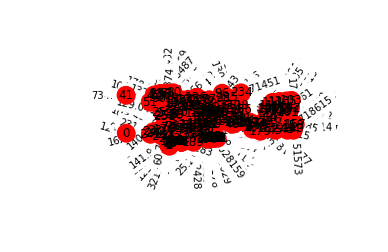

In [19]:
fig = plt.figure                                    
ax = plt.subplot(111)                               

nx.draw(w_G,nx.get_node_attributes(w_G, 'pos'))
nx.draw_networkx_edge_labels(w_G,nx.get_node_attributes(w_G, 'pos'),edge_labels=labels)
nx.draw_networkx_labels(w_G,nx.get_node_attributes(w_G, 'pos'))
nx.draw_networkx_nodes(w_G,nx.get_node_attributes(w_G, 'pos'),node_color=color_map)

In [ ]:
def Distance(Node1, Node2, Print=False):
    # calculate distance between two points
    distance = geopy.distance.vincenty(Node1, Node2).m

In [ ]:
import utm
import networkx as nx
location1 = utm.from_latlon(nx.get_node_attributes(w_G, 'pos')[24][0],nx.get_node_attributes(w_G, 'pos')[24][1])
location2 = utm.from_latlon(nx.get_node_attributes(w_G, 'pos')[15][0],nx.get_node_attributes(w_G, 'pos')[15][1])
distance = ((location2[0]-location1[0])**2+(location2[1]-location1[1])**2)**0.5
print(distance)



In [ ]:
#!/usr/bin/env python

# Haversine formula example in Python
# Author: Wayne Dyck

import math

